In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
Train = '/kaggle/input/chest-xray-pneumonia/train'
test = '/kaggle/input/chest-xray-pneumonia/test'
val = '/kaggle/input/chest-xray-pneumonia/val'

Train

'/kaggle/input/chest-xray-pneumonia/train'

In [3]:
import os

train = 'C:/Users/vinit/Desktop/siddhesh/chest_xray/chest_xray/train'
print("Train Directories:", os.listdir(train))

test = 'C:/Users/vinit/Desktop/siddhesh/chest_xray/chest_xray/test'
print("Test Directories:", os.listdir(test))

val = 'C:/Users/vinit/Desktop/siddhesh/chest_xray/chest_xray/val'
print("Validation Directories:", os.listdir(val))


Train Directories: ['.DS_Store', 'NORMAL', 'PNEUMONIA']
Test Directories: ['.DS_Store', 'NORMAL', 'PNEUMONIA']
Validation Directories: ['.DS_Store', 'NORMAL', 'PNEUMONIA']


In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np 
import matplotlib.pyplot as plt

def plot_img(img_path):
    """Load and display an image."""
    img = load_img(img_path)  # Load the image using Keras
    plt.imshow(img)
    plt.axis('off')  # Hide axis for better visualization
    plt.show()

def test_image(path):
    """Preprocess image for model input and display it."""
    image = load_img(path, target_size=(150, 150))  # Resize to match model input size
    image = img_to_array(image)  # Convert to array
    image = image.astype('float32') / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Expand dimensions for model

    plot_img(path)  # Show image
    return image  # Return preprocessed image


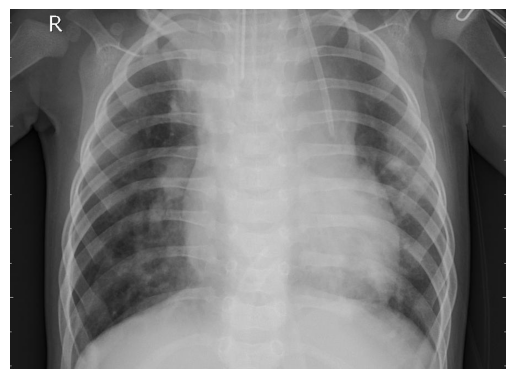

In [5]:
img_path = "C:/Users/vinit/Desktop/siddhesh/chest_xray/test/PNEUMONIA/person103_bacteria_488.jpeg"
image = test_image(img_path)

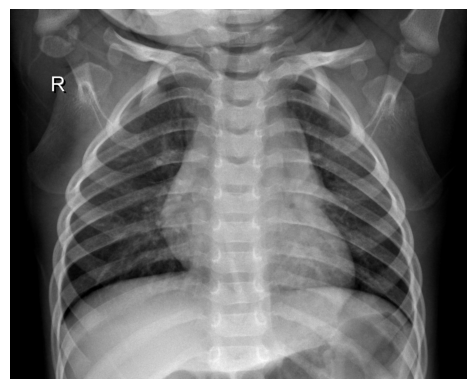

In [6]:
img_path = "C:/Users/vinit/Desktop/siddhesh/chest_xray/train/NORMAL/IM-0117-0001.jpeg"
image = test_image(img_path)

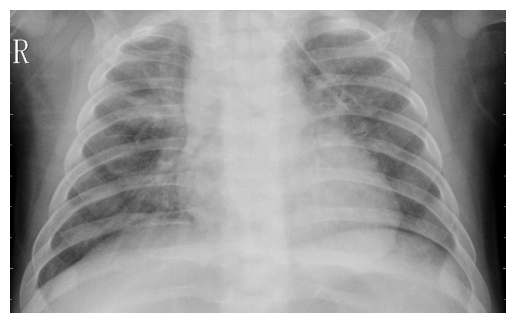

In [7]:
img_path = "C:/Users/vinit/Desktop/siddhesh/chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg"
image = test_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


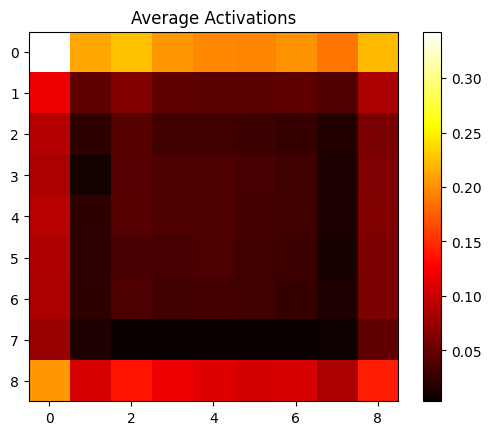

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

# Load VGG16 (without top layers to get feature maps)
base_model = VGG16(weights="imagenet", include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer("block5_conv3").output)  # Extracting feature maps


# Preprocess input image
x = preprocess_input(image)
features = model.predict(x)
features.shape

features = features.squeeze()  

average_activations = features.mean(axis=-1)
plt.imshow(average_activations, cmap='hot')
plt.title('Average Activations')
plt.colorbar()
plt.show()

In [9]:
import cv2
leaf_img= cv2.imread('C:/Users/vinit/Desktop/siddhesh/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg')
grayimg = cv2.cvtColor(leaf_img,cv2.COLOR_BGR2GRAY)

New Image Shape (680, 1024)


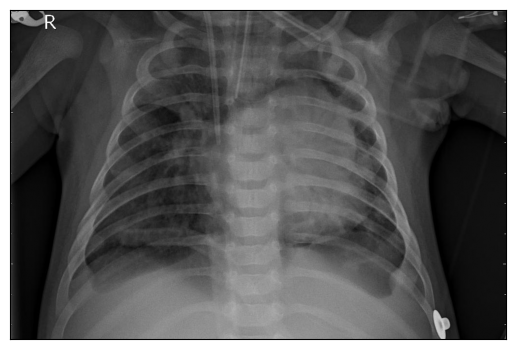

In [10]:
import matplotlib.pyplot as plt
plt.imshow(grayimg,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('New Image Shape',grayimg.shape)

In [11]:
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(grayimg)
print('The optimal seperation value is',thresh_val)

The optimal seperation value is 80


In [12]:
from matplotlib import pyplot as plt

def show_image(image, title='Image', cmap_type='gray'): 
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

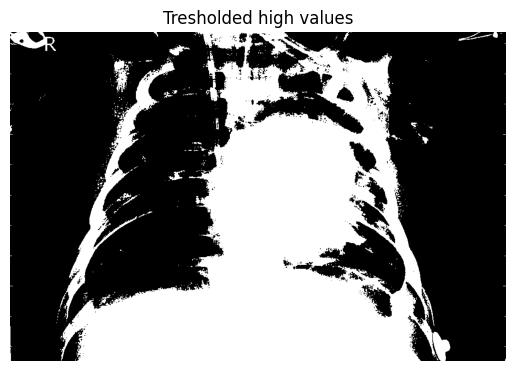

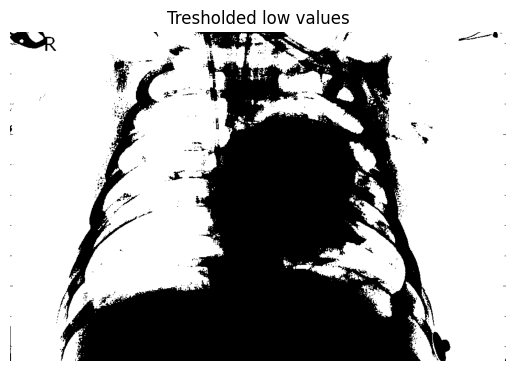

In [13]:
thresh = 200

binary_high = grayimg > thresh_val
binary_low = grayimg <= thresh_val

show_image(binary_high, 'Tresholded high values')
show_image(binary_low, 'Tresholded low values')

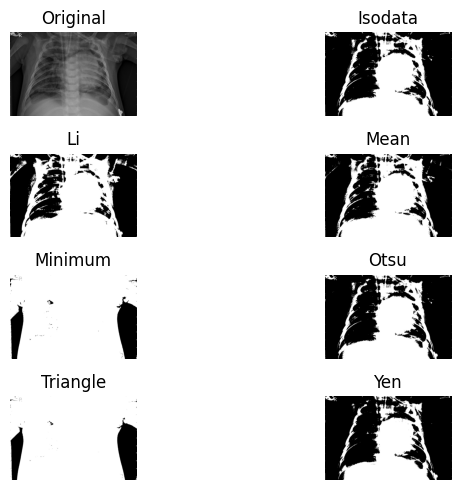

In [14]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(grayimg, verbose=False)

In [15]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray) 
  ax1.set_title('original') 
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray) 
  ax2.set_title(title_filtered) 
  ax2.axis('off')

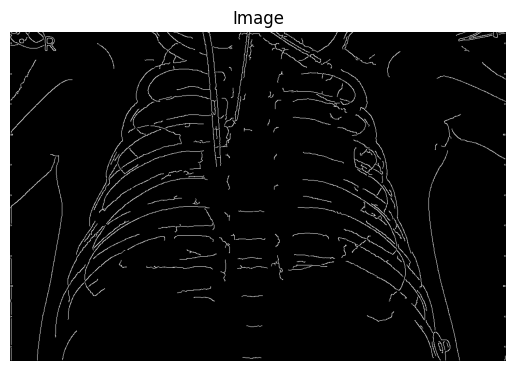

In [16]:
from skimage.feature import canny
canny_img = canny(grayimg)

show_image(canny_img)

In [17]:
def train_val_generators(train, val):
    train_datagen = ImageDataGenerator(rescale = 1./255.,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    horizontal_flip = True,
                    )
    train_generator = train_datagen.flow_from_directory(directory = train,
                                                       batch_size = 100,
                                                       class_mode = 'binary',
                                                       target_size = (150,150))
    val_datagen = ImageDataGenerator(rescale = 1./255.)
    val_generator = val_datagen.flow_from_directory(directory = val,
                                                       batch_size = 10,
                                                       class_mode = 'binary',
                                                       target_size = (150,150))
    return train_generator, val_generator

train_generator, validation_generator = train_val_generators(train, test)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
def image_gen(train_data_dir, valid_data_dir):
    train_datagen = ImageDataGenerator(rescale = 1./255.,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    horizontal_flip = True,
                    )
    train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='training'
                )
    val_datagen = ImageDataGenerator(rescale = 1./255.)

    validation_generator = val_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical'
    )
    return validation_generator, train_generator

In [19]:
train_generator, validation_generator = image_gen('C:/Users/vinit/Desktop/siddhesh/chest_xray/train', 'C:/Users/vinit/Desktop/siddhesh/chest_xray/test')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [20]:
def image_gene(file_dir_Path):
    val_datagen = ImageDataGenerator(rescale = 1./255.)
    validation_generator = val_datagen.flow_from_directory(
                    file_dir_Path,
                    target_size=(224, 224),  
                    batch_size=32,
                    class_mode='categorical')
    return validation_generator

validation_generator = image_gene('C:/Users/vinit/Desktop/siddhesh/chest_xray/val')

Found 16 images belonging to 2 classes.


In [21]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, callbacks

In [22]:
train = 'C:/Users/vinit/Desktop/siddhesh/chest_xray/chest_xray/train'
val = 'C:/Users/vinit/Desktop/siddhesh/chest_xray/chest_xray/val'

In [23]:

def train_val_generators(train_dir, val_dir):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='sparse'
    )

    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='sparse'
    )

    return train_generator, val_generator

train_generator, val_generator = train_val_generators(train, val)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [24]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = True

for layer in base_model.layers[:-8]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,530 (56.64 MB)

 Trainable params: 13,111,042 (50.01 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [25]:
history_1 = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

test = 'C:/Users/vinit/Desktop/siddhesh/chest_xray/chest_xray/test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    shuffle=False 
)

test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")
print(f"📉 Test Loss: {test_loss:.4f}")

c:\Users\vinit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 145s 878ms/step - accuracy: 0.8117 - loss: 0.6885 - val_accuracy: 0.7500 - val_loss: 0.6135 - learning_rate: 1.0000e-04
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 855ms/step - accuracy: 0.9316 - loss: 0.4004 - val_accuracy: 0.7500 - val_loss: 0.7252 - learning_rate: 1.0000e-04
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 876ms/step - accuracy: 0.9482 - loss: 0.2863 - val_accuracy: 0.7500 - val_loss: 0.6727 - learning_rate: 1.0000e-04
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 875ms/step - accuracy: 0.9608 - loss: 0.2249 - val_accuracy: 0.9375 - val_loss: 0.2517 - learning_rate: 1.0000e-04
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 867ms/step - accuracy: 0.9560 - loss: 0.2034 - val_accuracy: 0.8750 - val_loss: 0.2454 - learning_rate: 1.0000e-04
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 861ms/step - accuracy: 0.9652 - loss: 0.1578 - val_accuracy: 0.7500 - val_loss: 0.7031 - learning_rate: 1.0000e-04
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 

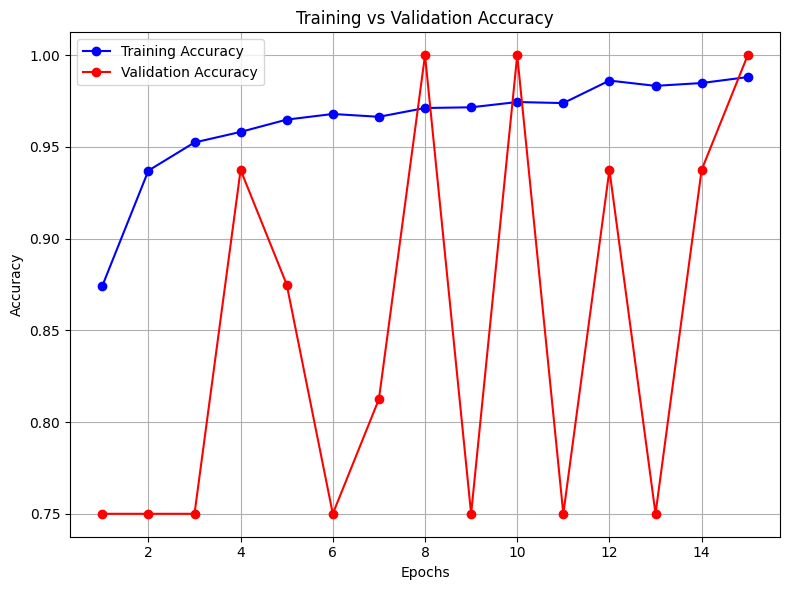

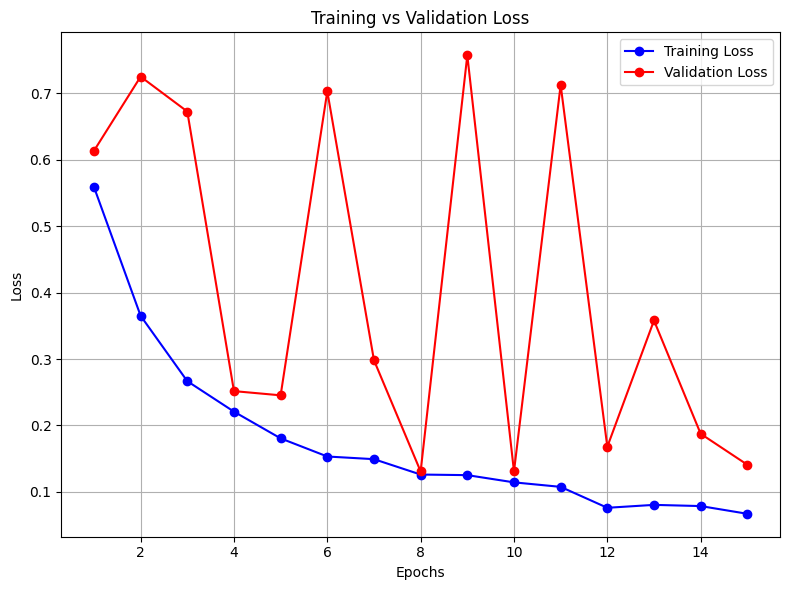

In [26]:
import matplotlib.pyplot as plt

acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plotting Accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'b-o', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-o', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, 'b-o', label='Training Loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Extract class labels
class_names = list(test_generator.class_indices.keys())

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()



KeyboardInterrupt



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            smoothed.append(smoothed[-1] * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

# Assuming history.history is your training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 7))
plt.plot(smooth_curve(acc), 'bo-', label='Training Accuracy')
plt.plot(smooth_curve(val_acc), 'ro-', label='Validation Accuracy')
plt.title('Smoothed Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
